<a href="https://colab.research.google.com/github/rodayna-moamen/fraud_detection_project/blob/main/data_eng_notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/zeinashaarawy/DataEngineeringProject

Cloning into 'DataEngineeringProject'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 25 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 11.04 KiB | 11.04 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
%cd DataEngineeringProject

/content/DataEngineeringProject/DataEngineeringProject


In [ ]:
!git branch -a

* main
  remotes/origin/HEAD -> origin/main
  remotes/origin/Kenzy
  remotes/origin/Marwan
  remotes/origin/Nour
  remotes/origin/Rodayna
  remotes/origin/Zeina
  remotes/origin/main


In [ ]:
!git checkout Rodayna

Branch 'Rodayna' set up to track remote branch 'Rodayna' from 'origin'.
Switched to a new branch 'Rodayna'


In [ ]:
!pip install pandas matplotlib seaborn plotly


data exploration & era lead

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load crashes dataset
crashes_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=download'
df_crashes = pd.read_csv(crashes_url, low_memory=False)

# Load persons dataset
persons_url = 'https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download'
df_persons = pd.read_csv(persons_url, low_memory=False)


In [ ]:
print(df_crashes.head())
print(df_persons.head())


   CRASH DATE CRASH TIME   BOROUGH ZIP CODE  LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN       NaN        NaN   
1  03/26/2022      11:45       NaN      NaN       NaN        NaN   
2  11/01/2023       1:29  BROOKLYN    11230  40.62179 -73.970024   
3  06/29/2022       6:55       NaN      NaN       NaN        NaN   
4  09/21/2022      13:21       NaN      NaN       NaN        NaN   

                 LOCATION           ON STREET NAME CROSS STREET NAME  \
0                     NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                     NaN  QUEENSBORO BRIDGE UPPER               NaN   
2  (40.62179, -73.970024)            OCEAN PARKWAY          AVENUE K   
3                     NaN       THROGS NECK BRIDGE               NaN   
4                     NaN          BROOKLYN BRIDGE               NaN   

  OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0             NaN  ...                    Unspecified   
1             NaN  ...                      

In [ ]:
print(df_crashes.describe())
print(df_persons.describe())


           LATITUDE     LONGITUDE  NUMBER OF PERSONS INJURED  \
count  1.979311e+06  1.979311e+06               2.219639e+06   
mean   4.059025e+01 -7.368399e+01               3.281957e-01   
std    2.330352e+00  4.331881e+00               7.149202e-01   
min    0.000000e+00 -2.013600e+02               0.000000e+00   
25%    4.066734e+01 -7.397453e+01               0.000000e+00   
50%    4.072032e+01 -7.392674e+01               0.000000e+00   
75%    4.076956e+01 -7.386657e+01               0.000000e+00   
max    4.334444e+01  0.000000e+00               4.300000e+01   

       NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
count              2.219626e+06                   2.219657e+06   
mean               1.585402e-03                   5.958984e-02   
std                4.206432e-02                   2.500402e-01   
min                0.000000e+00                   0.000000e+00   
25%                0.000000e+00                   0.000000e+00   
50%                0.000000

In [ ]:
print(df_crashes.isnull().sum())
print(df_persons.isnull().sum())


CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           680127
ZIP CODE                          680402
LATITUDE                          240346
LONGITUDE                         240346
LOCATION                          240346
ON STREET NAME                    483397
CROSS STREET NAME                 848140
OFF STREET NAME                  1828634
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7837
CONTRIBUTING FACTOR VEHICLE 2     356262
CONTRIBUTING FACTOR VEHICLE 3    2059062
CONTRIBUTING FACTOR VEHICLE 4    2182991
CONTRIBUTING FACTOR VEHICLE 5    2209616
COLLISION_ID                           0
VEHICLE TYPE COD

In [ ]:
print(df_crashes.columns)


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')


In [ ]:
print(df_persons.columns)

Index(['UNIQUE_ID', 'COLLISION_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID',
       'PERSON_TYPE', 'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCATION', 'PED_ACTION', 'COMPLAINT',
       'PED_ROLE', 'CONTRIBUTING_FACTOR_1', 'CONTRIBUTING_FACTOR_2',
       'PERSON_SEX'],
      dtype='object')


In [ ]:
def detect_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers


In [ ]:
# Outlier detection for 'NUMBER OF PERSONS INJURED'
outliers_injured = detect_outliers(df_crashes, 'NUMBER OF PERSONS INJURED')
print("Outliers in 'NUMBER OF PERSONS INJURED':")
print(outliers_injured)

# Outlier detection for 'NUMBER OF PERSONS KILLED'
outliers_killed = detect_outliers(df_crashes, 'NUMBER OF PERSONS KILLED')
print("Outliers in 'NUMBER OF PERSONS KILLED':")
print(outliers_killed)

# Outlier detection for 'NUMBER OF PEDESTRIANS INJURED'
outliers_ped_injured = detect_outliers(df_crashes, 'NUMBER OF PEDESTRIANS INJURED')
print("Outliers in 'NUMBER OF PEDESTRIANS INJURED':")
print(outliers_ped_injured)

# Outlier detection for 'NUMBER OF PEDESTRIANS KILLED'
outliers_ped_killed = detect_outliers(df_crashes, 'NUMBER OF PEDESTRIANS KILLED')
print("Outliers in 'NUMBER OF PEDESTRIANS KILLED':")
print(outliers_ped_killed)

# Outlier detection for 'NUMBER OF CYCLIST INJURED'
outliers_cyclist_injured = detect_outliers(df_crashes, 'NUMBER OF CYCLIST INJURED')
print("Outliers in 'NUMBER OF CYCLIST INJURED':")
print(outliers_cyclist_injured)

# Outlier detection for 'NUMBER OF CYCLIST KILLED'
outliers_cyclist_killed = detect_outliers(df_crashes, 'NUMBER OF CYCLIST KILLED')
print("Outliers in 'NUMBER OF CYCLIST KILLED':")
print(outliers_cyclist_killed)

# Outlier detection for 'NUMBER OF MOTORIST INJURED'
outliers_motorist_injured = detect_outliers(df_crashes, 'NUMBER OF MOTORIST INJURED')
print("Outliers in 'NUMBER OF MOTORIST INJURED':")
print(outliers_motorist_injured)

# Outlier detection for 'NUMBER OF MOTORIST KILLED'
outliers_motorist_killed = detect_outliers(df_crashes, 'NUMBER OF MOTORIST KILLED')
print("Outliers in 'NUMBER OF MOTORIST KILLED':")
print(outliers_motorist_killed)


Outliers in 'NUMBER OF PERSONS INJURED':
         CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0        09/11/2021       2:39        NaN      NaN        NaN        NaN   
1        03/26/2022      11:45        NaN      NaN        NaN        NaN   
2        11/01/2023       1:29   BROOKLYN    11230  40.621790 -73.970024   
13       12/14/2021       8:17      BRONX    10475  40.868160 -73.831480   
20       12/14/2021      23:10     QUEENS    11434  40.666840 -73.789410   
...             ...        ...        ...      ...        ...        ...   
2219647  11/08/2025      16:30  MANHATTAN    10018  40.753555 -73.985050   
2219648  11/08/2025      15:27  MANHATTAN    10014  40.731068 -74.008000   
2219649  10/20/2025      19:30   BROOKLYN    11209  40.629486 -74.022640   
2219655  11/08/2025      19:00      BRONX    10452  40.839880 -73.916790   
2219656  11/08/2025      14:46     QUEENS    11101  40.744442 -73.949356   

                        LOCATION           ON 

In [ ]:
# Outlier detection for 'PERSON_AGE'
outliers_age_persons = detect_outliers(df_persons, 'PERSON_AGE')
print("Outliers in 'PERSON_AGE':")
print(outliers_age_persons)


Outliers in 'PERSON_AGE':
         UNIQUE_ID  COLLISION_ID  CRASH_DATE CRASH_TIME  \
2881      10251916       4230071  10/27/2019      14:00   
3077      10256011       4231939  10/17/2019      13:22   
3295      10251917       4230071  10/27/2019      14:00   
3624      10251914       4230071  10/27/2019      14:00   
3841      10251915       4230071  10/27/2019      14:00   
...            ...           ...         ...        ...   
5815706   13525450       4855076  11/05/2025       8:34   
5815869   13525445       4855076  11/05/2025       8:34   
5815970   13527884       4855646  10/20/2025      23:00   
5816072   13527150       4855472  11/07/2025      12:45   
5816289   13528348       4855987  11/08/2025      18:40   

                                    PERSON_ID PERSON_TYPE PERSON_INJURY  \
2881     6cc1c8f4-6cb4-4dc9-b9c7-54625b15d677    Occupant   Unspecified   
3077     50ebc2ea-d14c-47e3-aff9-8ca7bd467ce3    Occupant   Unspecified   
3295     675ffb9d-367c-4676-9656-d7a9b73

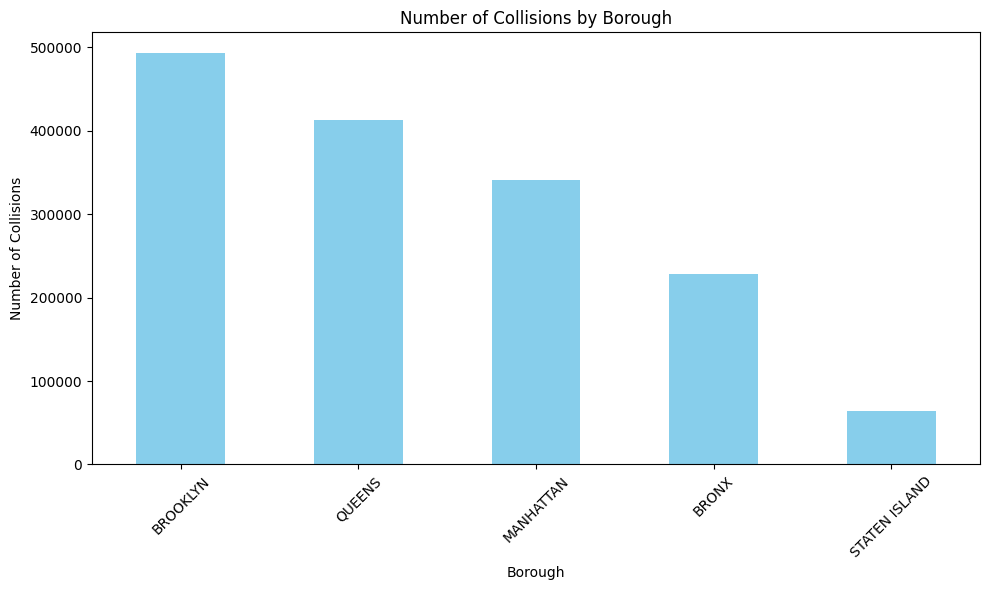

In [ ]:
import matplotlib.pyplot as plt

# Count the number of collisions by borough
borough_counts = df_crashes['BOROUGH'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
borough_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to the figs folder
plt.savefig('plot1')

# Display the plot
plt.show()


/tmp/ipython-input-2091797165.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_crashes['CRASH TIME'] = pd.to_datetime(df_crashes['CRASH TIME'], errors='coerce')


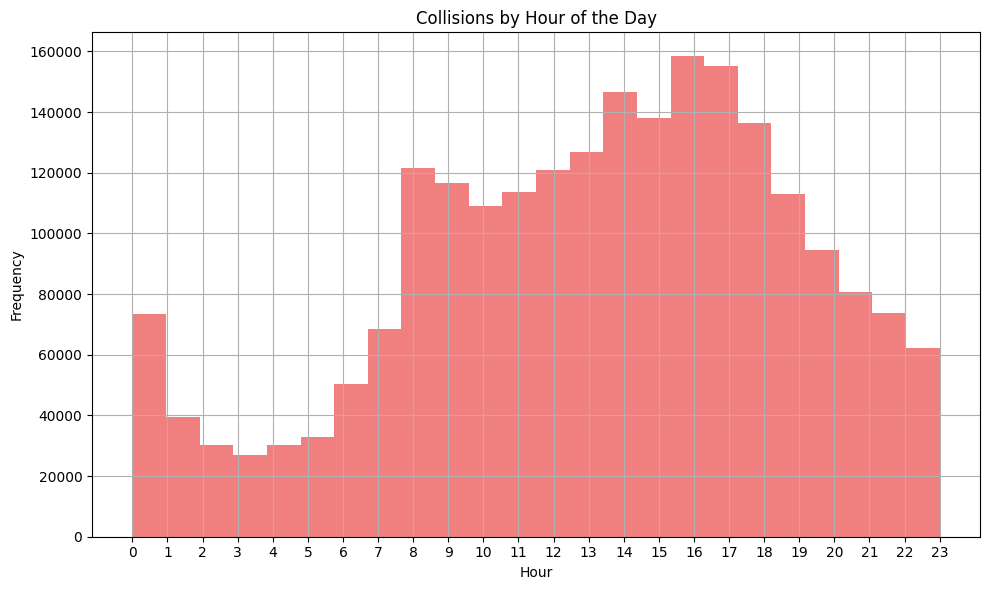

In [ ]:
# Convert the 'CRASH TIME' column to datetime (if needed) and extract the hour
df_crashes['CRASH TIME'] = pd.to_datetime(df_crashes['CRASH TIME'], errors='coerce')

# Extract the hour from 'CRASH TIME'
df_crashes['hour'] = df_crashes['CRASH TIME'].dt.hour

# Plot a histogram for collisions by hour
plt.figure(figsize=(10, 6))
df_crashes['hour'].dropna().hist(bins=24, color='lightcoral')
plt.title('Collisions by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(range(24))
plt.tight_layout()

# Save the plot
plt.savefig('plot2')

# Display the plot
plt.show()


In [ ]:
# Standardize column names
def standardize_column_names(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )
    return df

df_crashes = standardize_column_names(df_crashes)
df_persons = standardize_column_names(df_persons)


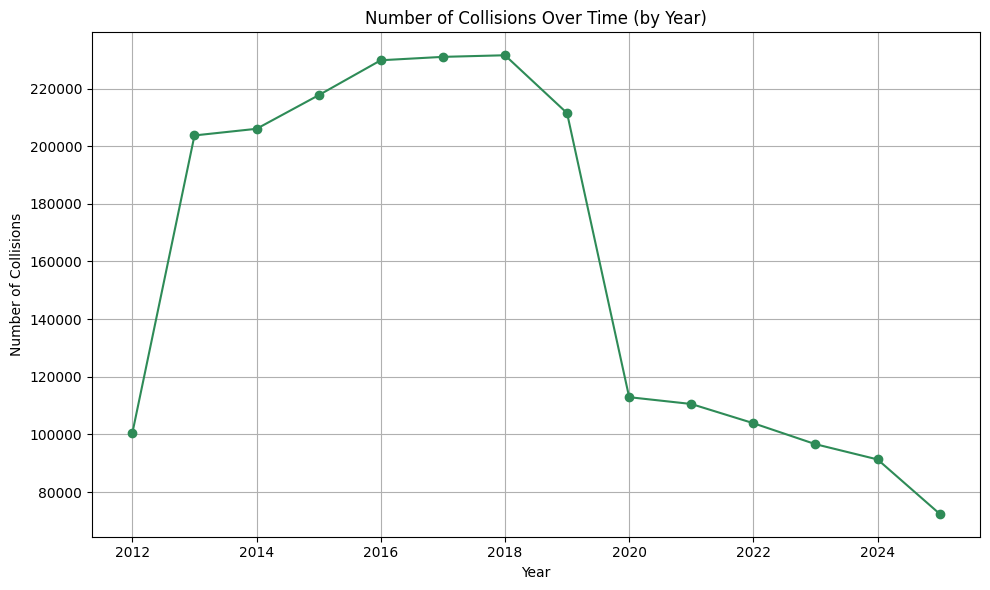

In [ ]:
import matplotlib.pyplot as plt

# Convert 'CRASH DATE' to datetime
df_crashes['CRASH DATE'] = pd.to_datetime(df_crashes['CRASH DATE'], errors='coerce')

# Group by year and count the number of collisions per year
collisions_by_year = df_crashes.groupby(df_crashes['CRASH DATE'].dt.year).size()

# Plot a time series (line plot)
plt.figure(figsize=(10, 6))
collisions_by_year.plot(kind='line', marker='o', color='seagreen')
plt.title('Number of Collisions Over Time (by Year)')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('plot3')

# Display the plot
plt.show()


In [ ]:
# Standardize column names
def standardize_column_names(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )
    return df

df_crashes = standardize_column_names(df_crashes)
df_persons = standardize_column_names(df_persons)


In [ ]:
# Standardize formats
df_crashes['crash_date'] = pd.to_datetime(df_crashes['crash_date'], errors='coerce')
df_crashes['crash_time'] = pd.to_datetime(df_crashes['crash_time'], errors='coerce').dt.time

if 'borough' in df_crashes.columns:
    df_crashes['borough'] = df_crashes['borough'].str.strip().str.title()


for col in df_persons.select_dtypes(include='object').columns:
    df_persons[col] = df_persons[col].str.strip().str.title()


/tmp/ipython-input-4257351310.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_crashes['crash_time'] = pd.to_datetime(df_crashes['crash_time'], errors='coerce').dt.time


In [ ]:
# Drop rows with missing collision_id (essential)
df_crashes = df_crashes.dropna(subset=['collision_id'])
df_persons = df_persons.dropna(subset=['collision_id'])

# Fill categorical nulls column by column to save memory
for col in df_crashes.select_dtypes(include='object').columns:
    df_crashes[col].fillna('Unknown', inplace=True)

for col in df_persons.select_dtypes(include='object').columns:
    df_persons[col].fillna('Unknown', inplace=True)

# Fill numeric nulls column by column to save memory
for col in df_crashes.select_dtypes(include='number').columns:
    median_val = df_crashes[col].median()
    df_crashes[col].fillna(median_val, inplace=True)

for col in df_persons.select_dtypes(include='number').columns:
    median_val = df_persons[col].median()
    df_persons[col].fillna(median_val, inplace=True)


/tmp/ipython-input-531954775.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_crashes[col].fillna('Unknown', inplace=True)
/tmp/ipython-input-531954775.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
print("Unique values and counts for 'person_injury' in df_persons:")
print(df_persons['person_injury'].value_counts())

Unique values and counts for 'person_injury' in df_persons:
person_injury
Unspecified    5086069
Injured         728343
Killed            3518
Name: count, dtype: int64


In [ ]:
print("Unique values and counts for 'contributing_factor_vehicle_1' in df_crashes:")
print(df_crashes['contributing_factor_vehicle_1'].value_counts())

Unique values and counts for 'contributing_factor_vehicle_1' in df_crashes:
contributing_factor_vehicle_1
Unspecified                       743077
Driver Inattention/Distraction    450597
Failure to Yield Right-of-Way     132956
Following Too Closely             119237
Backing Unsafely                   81025
                                   ...  
Windshield Inadequate                 88
Cell Phone (hand-held)                79
Texting                               58
Listening/Using Headphones            28
1                                     10
Name: count, Length: 62, dtype: int64


In [ ]:
df_crashes['contributing_factor_vehicle_1'] = df_crashes['contributing_factor_vehicle_1'].replace('1', 'Unspecified')

print("Unique values and counts for 'contributing_factor_vehicle_1' in df_crashes after normalization:")
print(df_crashes['contributing_factor_vehicle_1'].value_counts())

Unique values and counts for 'contributing_factor_vehicle_1' in df_crashes after normalization:
contributing_factor_vehicle_1
Unspecified                       743087
Driver Inattention/Distraction    450597
Failure to Yield Right-of-Way     132956
Following Too Closely             119237
Backing Unsafely                   81025
                                   ...  
Shoulders Defective/Improper          98
Windshield Inadequate                 88
Cell Phone (hand-held)                79
Texting                               58
Listening/Using Headphones            28
Name: count, Length: 61, dtype: int64


In [ ]:
import os

# Create folder if it doesn't exist
os.makedirs("data/processed", exist_ok=True)

# Save cleaned versions
df_crashes.to_csv("data/processed/cleaned_crashes.csv", index=False)
df_persons.to_csv("data/processed/cleaned_persons.csv", index=False)

print("✅ Cleaned datasets saved successfully in data/processed/")

✅ Cleaned datasets saved successfully in data/processed/


integration_post_cleaning.ipynb

In [ ]:
# List the files in the current directory to see if the 'data/processed/' folder exists
import os
os.listdir('/content')


['.config',
 'Motor_Vehicle_Collisions_-_Person_20251111.csv',
 '.ipynb_checkpoints',
 'DataEngineeringProject',
 'Motor_Vehicle_Collisions_-_Crashes_20251111.csv',
 'sample_data']

In [ ]:
# Load the cleaned datasets from the files in the current directory
df_crashes_clean = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes_20251111.csv', engine='python', on_bad_lines='warn')
df_persons_clean = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Person_20251111.csv', engine='python', on_bad_lines='warn')

# Check the first few rows to confirm data is loaded
print(df_crashes_clean.head())
print(df_persons_clean.head())

/tmp/ipython-input-3344969206.py:2: ParserWarning: Skipping line 602173: unexpected end of data

  df_crashes_clean = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Crashes_20251111.csv', engine='python', on_bad_lines='warn')
/tmp/ipython-input-3344969206.py:3: ParserWarning: Skipping line 746533: unexpected end of data

  df_persons_clean = pd.read_csv('/content/Motor_Vehicle_Collisions_-_Person_20251111.csv', engine='python', on_bad_lines='warn')


   CRASH DATE CRASH TIME   BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN       NaN       NaN        NaN   
1  03/26/2022      11:45       NaN       NaN       NaN        NaN   
2  11/01/2023       1:29  BROOKLYN   11230.0  40.62179 -73.970024   
3  06/29/2022       6:55       NaN       NaN       NaN        NaN   
4  09/21/2022      13:21       NaN       NaN       NaN        NaN   

                     LOCATION           ON STREET NAME CROSS STREET NAME  \
0                         NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                         NaN  QUEENSBORO BRIDGE UPPER               NaN   
2      (40.62179, -73.970024)            OCEAN PARKWAY          AVENUE K   
3                         NaN       THROGS NECK BRIDGE               NaN   
4                         NaN          BROOKLYN BRIDGE               NaN   

  OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0             NaN  ...                    Unspecified   
1             

In [ ]:
# Ensure COLLISION_ID is of the same type in both dataframes
df_crashes_clean['COLLISION_ID'] = df_crashes_clean['COLLISION_ID'].astype('int64')
df_persons_clean['COLLISION_ID'] = df_persons_clean['COLLISION_ID'].astype('int64')

# Merge the datasets on 'COLLISION_ID' (left join keeps all crashes, even if no matching persons data)
df_integrated = df_crashes_clean.merge(df_persons_clean, on='COLLISION_ID', how='left')

# Check the first few rows of the integrated data
print(df_integrated.head())


   CRASH DATE CRASH TIME   BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN       NaN       NaN        NaN   
1  03/26/2022      11:45       NaN       NaN       NaN        NaN   
2  11/01/2023       1:29  BROOKLYN   11230.0  40.62179 -73.970024   
3  06/29/2022       6:55       NaN       NaN       NaN        NaN   
4  09/21/2022      13:21       NaN       NaN       NaN        NaN   

                     LOCATION           ON STREET NAME CROSS STREET NAME  \
0                         NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                         NaN  QUEENSBORO BRIDGE UPPER               NaN   
2      (40.62179, -73.970024)            OCEAN PARKWAY          AVENUE K   
3                         NaN       THROGS NECK BRIDGE               NaN   
4                         NaN          BROOKLYN BRIDGE               NaN   

  OFF STREET NAME  ...  BODILY_INJURY  POSITION_IN_VEHICLE  SAFETY_EQUIPMENT  \
0             NaN  ...            NaN           

In [ ]:
# Check for missing values after the merge
df_integrated.isnull().sum()

# Fill missing values (0 for total counts)
df_integrated['total_persons'] = df_integrated['total_persons'].fillna(0).astype(int)
df_integrated['total_injured_persons'] = df_integrated['total_injured_persons'].fillna(0).astype(int)
df_integrated['total_killed_persons'] = df_integrated['total_killed_persons'].fillna(0).astype(int)


In [ ]:
# Check all column names in df_integrated
print(df_integrated.columns)


Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'UNIQUE_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID', 'PERSON_TYPE',
       'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODILY_INJURY', 'POSITION_IN_VEHICLE',
       'SAFETY_EQUIPMENT', 'PED_LOCA

In [ ]:
# Create new columns based on the available data
df_integrated['total_persons'] = df_integrated['NUMBER OF PERSONS INJURED'] + df_integrated['NUMBER OF PERSONS KILLED']

df_integrated['total_injured_persons'] = df_integrated['NUMBER OF PERSONS INJURED']

df_integrated['total_killed_persons'] = df_integrated['NUMBER OF PERSONS KILLED']


In [ ]:
# Fill missing values with 0 where applicable (e.g., if there are crashes with no injuries or deaths)
df_integrated['total_persons'] = df_integrated['total_persons'].fillna(0).astype(int)
df_integrated['total_injured_persons'] = df_integrated['total_injured_persons'].fillna(0).astype(int)
df_integrated['total_killed_persons'] = df_integrated['total_killed_persons'].fillna(0).astype(int)


In [ ]:
# Flag if the crash involved a fatality (if there are any killed persons)
df_integrated['has_fatality'] = (df_integrated['total_killed_persons'] > 0).astype(int)

# Extract year, month, and hour from CRASH_DATE and CRASH_TIME
df_integrated['CRASH_YEAR'] = pd.to_datetime(df_integrated['CRASH_DATE']).dt.year
df_integrated['CRASH_MONTH'] = pd.to_datetime(df_integrated['CRASH_DATE']).dt.month
df_integrated['CRASH_HOUR'] = pd.to_datetime(df_integrated['CRASH_TIME'], format='%H:%M').dt.hour


In [ ]:
# Drop redundant or unnecessary columns
df_integrated.drop(columns=['extra_column_1', 'extra_column_2'], inplace=True, errors='ignore')

In [ ]:
# Convert CRASH_DATE to datetime if not already done
df_integrated['CRASH_DATE'] = pd.to_datetime(df_integrated['CRASH_DATE'])


In [ ]:
# Save the cleaned and integrated dataset for website usage
import os
# Create the 'data' directory if it doesn't exist
if not os.path.exists('data'):
    os.makedirs('data')
df_integrated.to_csv('data/nyc_collisions_final.csv', index=False)